In [48]:
# pramble
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime


# Part 1 | Exploration

Dataset from [kaggle link](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data)

In [49]:
# reading player data
players = pd.read_csv('data/online_gaming_behavior_dataset.csv')


In [50]:
# finding structure of dataset

players.info()

print('players.columns')

players.head(100)


<class 'pandas.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  str    
 3   Location                   40034 non-null  str    
 4   GameGenre                  40034 non-null  str    
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  str    
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  str    
dtypes: float64(1), int64(7), str(5)
memory usage: 4.0 MB
play

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9095,49,Male,Europe,Sports,7.838045,0,Easy,19,126,3,14,High
96,9096,28,Male,USA,Strategy,9.208411,1,Medium,1,84,61,39,Low
97,9097,17,Male,Europe,Strategy,8.644038,0,Easy,3,117,1,11,Medium
98,9098,15,Female,Europe,Simulation,5.970601,0,Easy,11,55,54,37,Medium


In [51]:
# Not comparing to other databases so, PlayerID can be removed
players = players.drop(['PlayerID'], axis = 1)  


# Renaming columns for ease
col_dict = {'Age' : 'age', 'Gender': 'gender', 'Location': 'location', 'GameGenre': 'genre', 
            'PlayTimeHours': 'play_time', 'InGamePurchases': 'purchases', 'GameDifficulty': 'difficulty', 'SessionsPerWeek': 'week_sessions',
            'AvgSessionDurationMinutes': 'avg_play_duration', 'PlayerLevel': 'p_level', 'AchievementsUnlocked': 'achievemnets' ,
            'EngagementLevel': 'engagement'}
players.rename(columns = col_dict, inplace=True)


In [52]:
columns = players.columns
catagory_columns = [x for x in columns if players[x].dtype in ['object', 'string']]
num_columns = [x for x in columns if x not in catagory_columns and players[x].dtype in ['int64', 'float64']]

print(catagory_columns)

['gender', 'location', 'genre', 'difficulty', 'engagement']


## Plotting

Text(0.5, 0, 'Engagement Level')

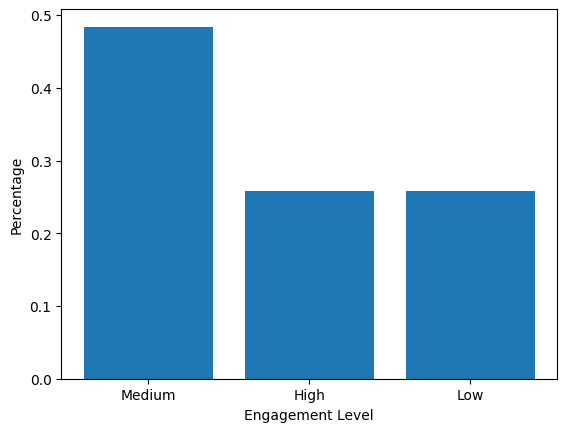

In [55]:

engagement_count = players['engagement'].value_counts()
engagement_lvls = engagement_count.index.tolist()

fig, ax = plt.subplots(1)

ax.bar(engagement_lvls, engagement_count/ engagement_count.sum())
ax.set_ylabel('Percentage')
ax.set_xlabel('Engagement Level') 



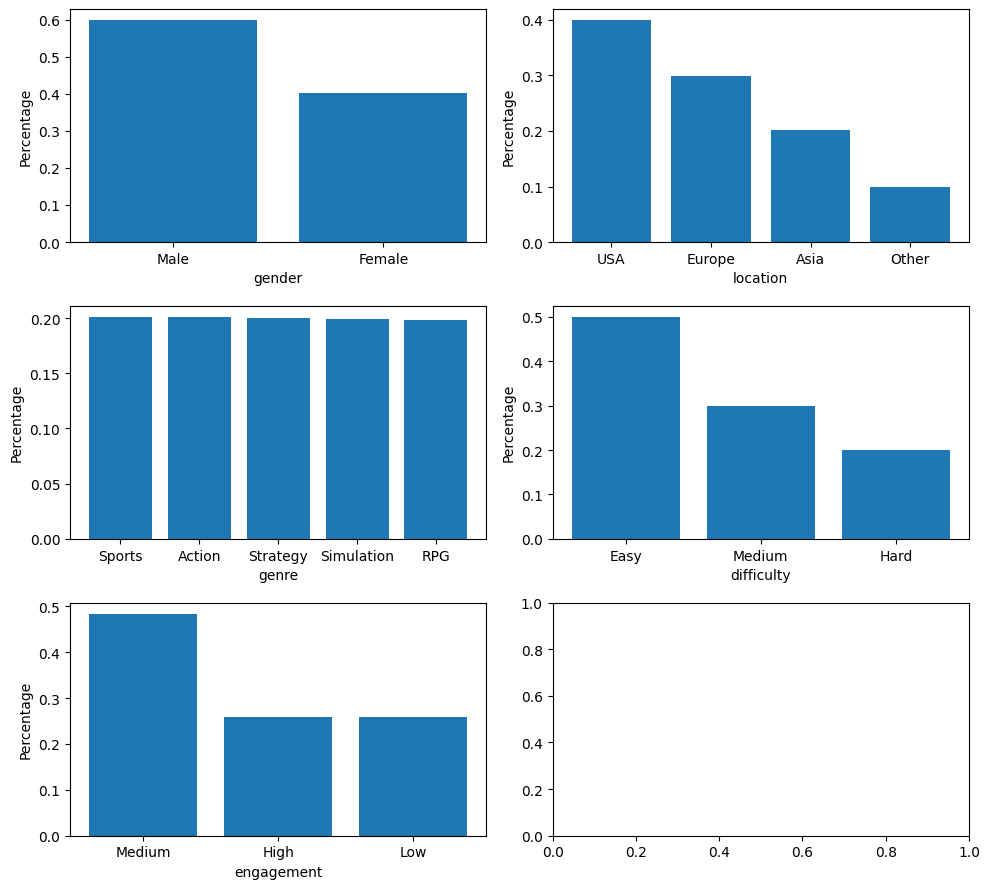

In [ ]:
# Plotting all categorical data

fig, ax = plt.subplots( len(catagory_columns) // 2 + len(catagory_columns) % 2, 2, figsize = (10,9) )

ax = ax.flatten()

for i, column_name in enumerate(catagory_columns):
    counts = players[column_name].value_counts()
    cat_types = counts.index.tolist() 
    ax[i].bar(cat_types, counts/ counts.sum()) # could have done proportions with normalised = True
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Percentage')
plt.tight_layout()
plt.show()


In [ ]:
num_columns

['age',
 'play_time',
 'purchases',
 'week_sessions',
 'avg_play_duration',
 'p_level',
 'achievemnets']

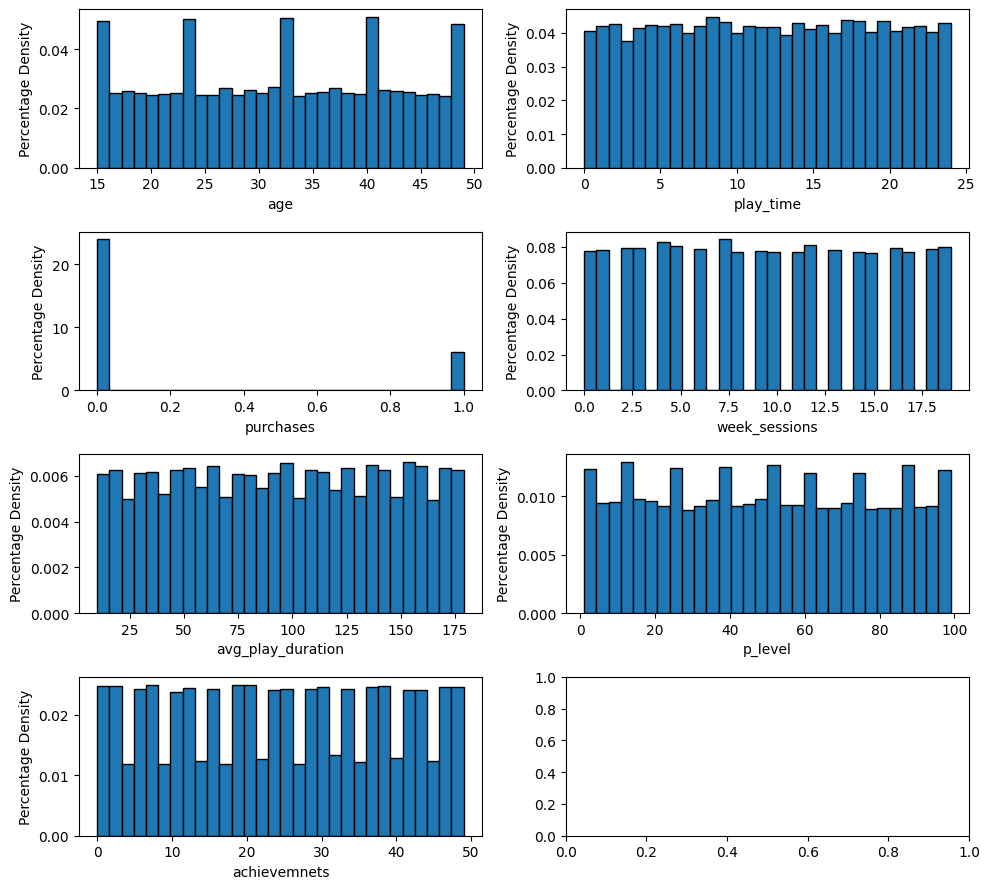

In [ ]:
# Plotting numerical data

# Starting with example

# fig, ax = plt.subplots(1)
# num_columns[1]
# ax.hist(players[num_columns[1]], edgecolor = 'black')

fig, ax = plt.subplots( len(num_columns) // 2 + len(num_columns) % 2, 2, figsize = (10,9) )

ax = ax.flatten()



for i, column_name in enumerate(num_columns):
    ax[i].hist(players[column_name], bins =30 , edgecolor = 'black', density = True) # density= True means tha the histograms are probability distributions
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Percentage Density')

plt.tight_layout()
plt.show()

## week_sessions looks strange, this is becasue values are only integer so there are too many bins 


## Correlation

In [57]:


# Converting categories into indexs

for catagory in catagory_columns:
    value_names = players[catagory].value_counts().index.tolist()
    dict = {name:index for index, name in enumerate(value_names)} 
    players[catagory] = players[catagory].map(dict)


# NB: The indecies for engament are not ordered such that 0 <--> Low and so on
print(engagement_lvls) 
# This should either be fixed or accounted for
# 'Medium' has been assigned 0, 'High' 1 and 'Low', 2.
players['engagement'] = players['engagement'].map({0:1,1:2,2:0})



players.head(10)

['Medium', 'High', 'Low']


,age,gender,location,genre,play_time,purchases,difficulty,week_sessions,avg_play_duration,p_level,achievemnets,engagement
0,43,0,3,2,16.271119,0,1,6,108,79,25,1
1,29,1,0,2,5.525961,0,1,5,144,11,10,1
2,22,1,0,0,8.223755,0,0,16,142,35,41,2
3,35,0,0,1,5.265351,1,0,9,85,57,47,1
4,33,0,1,1,15.531945,0,1,2,131,95,37,1
5,37,0,1,4,20.561855,0,0,2,81,74,22,0
6,25,0,0,1,9.752716,0,2,1,50,13,2,0
7,25,1,2,4,4.401729,0,1,10,48,27,23,1
8,38,1,1,3,18.152733,0,0,5,101,23,41,1
9,38,1,3,0,23.942772,0,0,13,95,99,36,2


age                  0.000824
gender               0.004978
location            -0.000662
genre               -0.005532
play_time           -0.001849
purchases            0.008209
difficulty           0.005057
week_sessions        0.605996
avg_play_duration    0.476698
p_level              0.059315
achievemnets         0.060576
Name: engagement, dtype: float64


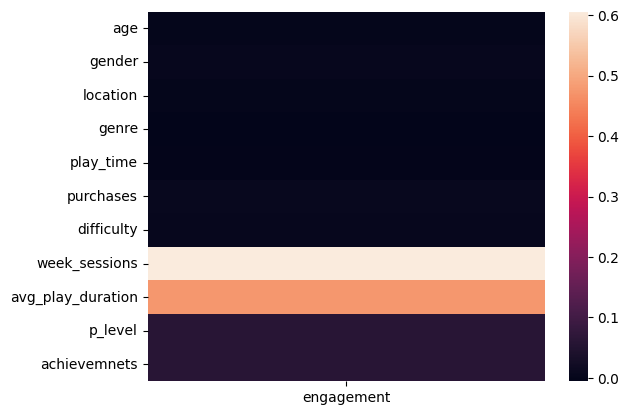

In [58]:
# Plotting correlation to engagement


corr = players.corr()

corr_engagement = corr['engagement'].drop('engagement')

print(corr_engagement)

sns.heatmap(corr_engagement.to_frame())
plt.show()

# Prediction Models

In [ ]:
## sk imports


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#no use imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn import metrics

## Logistic Regression

In [ ]:

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_columns)
    ]
)

# copy dataframe

players_copy = players

In [80]:
X = players_copy[num_columns]
Y = players_copy['engagement']


# split data into test and training data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [66]:
lr_model = Pipeline(steps= [('preprocessor', preprocessor), ('classifier', LogisticRegression())])

lr_model.fit(X_train, Y_train)

y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 2, 1, 1], shape=(8007,))

In [64]:

from sklearn import metrics

print(metrics.classification_report(Y_test, y_pred))



              precision    recall  f1-score   support

           0       0.79      0.70      0.74      2091
           1       0.80      0.88      0.84      3883
           2       0.90      0.83      0.86      2033

    accuracy                           0.82      8007
   macro avg       0.83      0.80      0.81      8007
weighted avg       0.82      0.82      0.82      8007



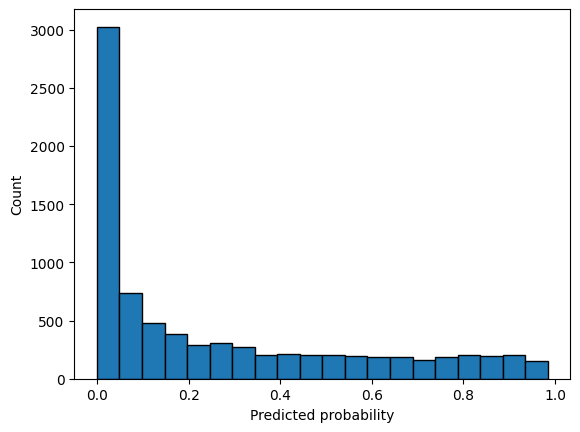

In [79]:
y_prob = lr_model.predict_proba(X_test)[:,0]

plt.hist(y_prob, bins=20, edgecolor = 'black')
plt.xlabel("Predicted probability")
plt.ylabel("Count")
plt.show()

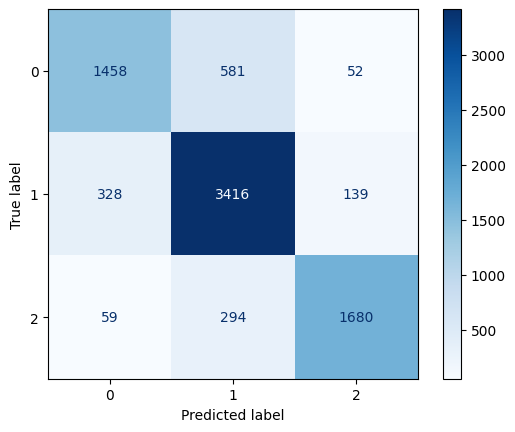

In [78]:
metrics.ConfusionMatrixDisplay.from_estimator(lr_model, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()